In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Variables to change at start of each year
country_code = ['AUS','CIV','DNK','FIN','IND','KEN','LKA','MDV','SGP','SYC']
Indicator_codes_list =['AG.LND.AGRI.K2','ER.FSH.PROD.MT','IC.BUS.NREG', 'IC.REG.DURS', 'SL.AGR.EMPL.ZS', 'SL.EMP.SELF.ZS']
One_indicator = 'Total fisheries production (metric tons)'
Corruption_sheet ='CPI Timeseries 2012 - 2020'
Year = 2020
Previous_year = str(Year - 1)
excel_file_path = 'report.xlsx'

### Read, Merge and Filter Data Sources

In [3]:
data = pd.read_csv('./MCB/WDIData.csv', sep =',')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [4]:
corruption_index= pd.read_excel('./MCB/Assignment/Corruption Perception Index Data Set.xlsx',sheet_name=Corruption_sheet,
                               header=2)
corruption_index = corruption_index[['ISO3','Region','CPI score '+ str(Year),'CPI score '+ Previous_year]]
corruption_index.head()

,ISO3,Region,CPI score 2020,CPI score 2019
0,DNK,WE/EU,88,87
1,NZL,AP,88,87
2,FIN,WE/EU,85,86
3,SGP,AP,85,85
4,SWE,WE/EU,85,85


In [5]:
indicators = Indicator_codes_list
filtered_data = data[data['Indicator Code'].str.strip().str.lower().isin(map(str.lower, indicators))]
# filtered_data = filtered_data.drop(columns='Indicator Code')
filtered_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
61,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,...,6.825399e+06,6.836526e+06,6.851382e+06,6.868999e+06,6.882362e+06,6.891016e+06,6.898158e+06,6.900856e+06,NaN,NaN
366,Africa Eastern and Southern,AFE,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.859871e+01,5.797176e+01,5.753939e+01,5.703465e+01,5.649751e+01,5.596058e+01,5.653089e+01,5.621378e+01,NaN,NaN
929,Africa Eastern and Southern,AFE,New businesses registered (number),IC.BUS.NREG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,Africa Eastern and Southern,AFE,"Self-employed, total (% of total employment) (...",SL.EMP.SELF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.378660e+01,7.343595e+01,7.335968e+01,7.318399e+01,7.298361e+01,7.298100e+01,7.410464e+01,7.389131e+01,NaN,NaN
1370,Africa Eastern and Southern,AFE,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.232000e+01,3.203846e+01,3.157692e+01,2.928846e+01,2.782692e+01,2.682692e+01,NaN,NaN,NaN,NaN


In [21]:
# Missing values
selected_years = ['2012','2013', '2014','2015', '2016', '2017', '2018', '2019', '2020']
selected_years_df = filtered_data[['Country Name', 'Indicator Name'] + selected_years]
pivoted_years_df = selected_years_df.pivot(index='Country Name', columns='Indicator Name', values=selected_years)
missing_values_per_indicator = pivoted_years_df.isnull().sum()
print("Missing Values for Each Unique Indicator in the Years 2019, and 2020:")
missing_values_per_indicator

Missing Values for Each Unique Indicator in the Years 2019, and 2020:


      Indicator Name                                                          
2012  Agricultural land (sq. km)                                                    8
      Employment in agriculture (% of total employment) (modeled ILO estimate)     31
      New businesses registered (number)                                          135
      Self-employed, total (% of total employment) (modeled ILO estimate)          31
      Time required to start a business (days)                                     41
      Total fisheries production (metric tons)                                     21
2013  Agricultural land (sq. km)                                                    8
      Employment in agriculture (% of total employment) (modeled ILO estimate)     31
      New businesses registered (number)                                          129
      Self-employed, total (% of total employment) (modeled ILO estimate)          31
      Time required to start a business (days)               

In [6]:
#Impute missing values for 'Time required to start a business (days)' indicator for year 2020
indicator_code = 'IC.REG.DURS'
numeric_columns = [str(year) for year in range(2013, 2021)]
filtered_data[numeric_columns] = filtered_data[numeric_columns]
indicator_rows = filtered_data['Indicator Code'] == indicator_code
filtered_data.loc[indicator_rows, numeric_columns] = filtered_data.loc[indicator_rows, numeric_columns].interpolate(method='linear', axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_14500\1949285327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numeric_columns] = filtered_data[numeric_columns]


In [7]:
merge_data = filtered_data.merge(corruption_index, how='left',left_on='Country Code', right_on='ISO3')
merge_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,2021,2022,Unnamed: 67,ISO3,Region,CPI score 2020,CPI score 2019
0,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,...,6.882362e+06,6.891016e+06,6.898158e+06,6.900856e+06,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.649751e+01,5.596058e+01,5.653089e+01,5.621378e+01,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,New businesses registered (number),IC.BUS.NREG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,"Self-employed, total (% of total employment) (...",SL.EMP.SELF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.298361e+01,7.298100e+01,7.410464e+01,7.389131e+01,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Time required to start a business (days),IC.REG.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.782692e+01,2.682692e+01,2.682692e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merge_data['ISO3'].isnull().sum()

528

In [9]:
merge_data.pop('ISO3')
merge_data.pop('Unnamed: 67')
column_to_move = merge_data.pop("Region")
merge_data.insert(2, "Region", column_to_move)

In [10]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1596 non-null   object 
 1   Country Code    1596 non-null   object 
 2   Region          1068 non-null   object 
 3   Indicator Name  1596 non-null   object 
 4   Indicator Code  1596 non-null   object 
 5   1960            245 non-null    float64
 6   1961            500 non-null    float64
 7   1962            500 non-null    float64
 8   1963            500 non-null    float64
 9   1964            500 non-null    float64
 10  1965            500 non-null    float64
 11  1966            500 non-null    float64
 12  1967            500 non-null    float64
 13  1968            500 non-null    float64
 14  1969            500 non-null    float64
 15  1970            500 non-null    float64
 16  1971            500 non-null    float64
 17  1972            500 non-null    f

In [11]:
# Resulted data to be used for reporting and analysis
master_data = merge_data.loc[:, ['Country Name', 'Country Code', 'Region','Indicator Name',Previous_year,str(Year),'CPI score '+ str(Year),'CPI score '+ Previous_year]] 
master_data.head()

,Country Name,Country Code,Region,Indicator Name,2019,2020,CPI score 2020,CPI score 2019
0,Africa Eastern and Southern,AFE,NaN,Agricultural land (sq. km),6.891016e+06,6.898158e+06,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,Employment in agriculture (% of total employme...,5.596058e+01,5.653089e+01,NaN,NaN
2,Africa Eastern and Southern,AFE,NaN,New businesses registered (number),NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,NaN,"Self-employed, total (% of total employment) (...",7.298100e+01,7.410464e+01,NaN,NaN
4,Africa Eastern and Southern,AFE,NaN,Time required to start a business (days),2.682692e+01,2.682692e+01,NaN,NaN


### Generating Report

In [12]:
pivoted_df = master_data.pivot(index=['Country Name', 'Country Code', 'Region','CPI score '+ str(Year),'CPI score '+ Previous_year], 
                     columns='Indicator Name', 
                     values=[Previous_year,str(Year)]).reset_index()
pivoted_df.columns = [f"{col[1]} {col[0]}" for col in pivoted_df.columns]
sorted_columns = list(pivoted_df.columns[:3]) + sorted(pivoted_df.columns[3:],reverse =True)
pivoted_df = pivoted_df[sorted_columns]
pivoted_df.head()

,Country Name,Country Code,Region,Total fisheries production (metric tons) 2020,Total fisheries production (metric tons) 2019,Time required to start a business (days) 2020,Time required to start a business (days) 2019,"Self-employed, total (% of total employment) (modeled ILO estimate) 2020","Self-employed, total (% of total employment) (modeled ILO estimate) 2019",New businesses registered (number) 2020,New businesses registered (number) 2019,Employment in agriculture (% of total employment) (modeled ILO estimate) 2020,Employment in agriculture (% of total employment) (modeled ILO estimate) 2019,Agricultural land (sq. km) 2020,Agricultural land (sq. km) 2019,CPI score 2020,CPI score 2019
0,Afghanistan,AFG,AP,11444.00,10729.00,8.500000,8.500000,84.333950,83.173020,NaN,NaN,45.983410,44.512630,383130.00,380100.000,19.0,16.0
1,Africa Eastern and Southern,AFE,NaN,4275133.64,4295166.75,26.826923,26.826923,74.104642,72.981002,NaN,NaN,56.530892,55.960579,6898158.22,6891016.220,NaN,NaN
2,Africa Western and Central,AFW,NaN,3551132.12,3666748.25,15.259091,15.259091,81.217591,79.797963,NaN,NaN,44.375664,44.313630,3633870.46,3627121.603,NaN,NaN
3,Albania,ALB,ECA,16711.16,15011.50,4.500000,4.500000,54.171330,54.268230,2945.0,3189.0,35.541970,36.416850,11655.55,11740.000,36.0,35.0
4,Algeria,DZA,MENA,76954.71,105388.57,18.000000,18.000000,31.027230,32.108170,NaN,NaN,10.524500,9.940742,413160.71,413160.710,36.0,35.0


In [13]:
for indicator in pivoted_df.columns[3:]:
    rank_col_name = f"{indicator} Rank"
    rank_col_name = rank_col_name.replace("['","")
    rank_col_name = rank_col_name.replace("']","")
    pivoted_df[rank_col_name] = pivoted_df[indicator].rank(ascending=False)

In [14]:
for col in pivoted_df.columns[17:]:
    indicator_name = " ".join(col.split()[:-2])  
    year = col.split()[-2] 
    new_col_name = f"{indicator_name} Rank {year}"
    pivoted_df = pivoted_df.rename(columns={col: new_col_name})

In [15]:
pivoted_df.columns = [col.strip(" ") for col in pivoted_df.columns]
sorted_columns = list(pivoted_df.columns[:3]) + sorted(pivoted_df.columns[3:],reverse =True)
pivoted_df = pivoted_df[sorted_columns]
pivoted_df.head()

,Country Name,Country Code,Region,Total fisheries production (metric tons) Rank 2020,Total fisheries production (metric tons) Rank 2019,Total fisheries production (metric tons) 2020,Total fisheries production (metric tons) 2019,Time required to start a business (days) Rank 2020,Time required to start a business (days) Rank 2019,Time required to start a business (days) 2020,...,Employment in agriculture (% of total employment) (modeled ILO estimate) 2020,Employment in agriculture (% of total employment) (modeled ILO estimate) 2019,CPI score Rank 2020,CPI score Rank 2019,CPI score 2020,CPI score 2019,Agricultural land (sq. km) Rank 2020,Agricultural land (sq. km) Rank 2019,Agricultural land (sq. km) 2020,Agricultural land (sq. km) 2019
0,Afghanistan,AFG,AP,195.0,197.0,11444.00,10729.00,174.0,174.0,8.500000,...,45.983410,44.512630,165.0,172.5,19.0,16.0,78.0,78.0,383130.00,380100.000
1,Africa Eastern and Southern,AFE,NaN,48.0,48.0,4275133.64,4295166.75,44.0,44.0,26.826923,...,56.530892,55.960579,NaN,NaN,NaN,NaN,26.0,26.0,6898158.22,6891016.220
2,Africa Western and Central,AFW,NaN,55.0,55.0,3551132.12,3666748.25,111.0,111.0,15.259091,...,44.375664,44.313630,NaN,NaN,NaN,NaN,38.0,38.0,3633870.46,3627121.603
3,Albania,ALB,ECA,186.0,189.0,16711.16,15011.50,212.5,212.5,4.500000,...,35.541970,36.416850,105.5,107.0,36.0,35.0,185.0,185.0,11655.55,11740.000
4,Algeria,DZA,MENA,139.0,132.0,76954.71,105388.57,90.5,90.5,18.000000,...,10.524500,9.940742,105.5,107.0,36.0,35.0,71.0,71.0,413160.71,413160.710


In [16]:
# Calculate difference between Scores and Rank
new_data = pivoted_df
for i in range(3, len(new_data.columns), 2):
    diff_col_name = f"{new_data.columns[i]} - {new_data.columns[i+1]}"
    new_data[diff_col_name] = new_data.iloc[:, i] - new_data.iloc[:, i+1]

In [17]:
new_data.head()

,Country Name,Country Code,Region,Total fisheries production (metric tons) Rank 2020,Total fisheries production (metric tons) Rank 2019,Total fisheries production (metric tons) 2020,Total fisheries production (metric tons) 2019,Time required to start a business (days) Rank 2020,Time required to start a business (days) Rank 2019,Time required to start a business (days) 2020,...,"Self-employed, total (% of total employment) (modeled ILO estimate) Rank 2020 - Self-employed, total (% of total employment) (modeled ILO estimate) Rank 2019","Self-employed, total (% of total employment) (modeled ILO estimate) 2020 - Self-employed, total (% of total employment) (modeled ILO estimate) 2019",New businesses registered (number) Rank 2020 - New businesses registered (number) Rank 2019,New businesses registered (number) 2020 - New businesses registered (number) 2019,Employment in agriculture (% of total employment) (modeled ILO estimate) Rank 2020 - Employment in agriculture (% of total employment) (modeled ILO estimate) Rank 2019,Employment in agriculture (% of total employment) (modeled ILO estimate) 2020 - Employment in agriculture (% of total employment) (modeled ILO estimate) 2019,CPI score Rank 2020 - CPI score Rank 2019,CPI score 2020 - CPI score 2019,Agricultural land (sq. km) Rank 2020 - Agricultural land (sq. km) Rank 2019,Agricultural land (sq. km) 2020 - Agricultural land (sq. km) 2019
0,Afghanistan,AFG,AP,195.0,197.0,11444.00,10729.00,174.0,174.0,8.500000,...,0.0,1.160930,NaN,NaN,-2.0,1.470780,-7.5,3.0,0.0,3030.000
1,Africa Eastern and Southern,AFE,NaN,48.0,48.0,4275133.64,4295166.75,44.0,44.0,26.826923,...,0.0,1.123640,NaN,NaN,-2.0,0.570313,NaN,NaN,0.0,7142.000
2,Africa Western and Central,AFW,NaN,55.0,55.0,3551132.12,3666748.25,111.0,111.0,15.259091,...,-1.0,1.419627,NaN,NaN,-2.0,0.062034,NaN,NaN,0.0,6748.857
3,Albania,ALB,ECA,186.0,189.0,16711.16,15011.50,212.5,212.5,4.500000,...,2.0,-0.096900,1.0,-244.0,4.0,-0.874880,-1.5,1.0,0.0,-84.450
4,Algeria,DZA,MENA,139.0,132.0,76954.71,105388.57,90.5,90.5,18.000000,...,4.0,-1.080940,NaN,NaN,-2.0,0.583758,-1.5,1.0,0.0,0.000


In [18]:
sorted_columns = list(new_data.columns[:3]) + sorted(new_data.columns[3:],reverse =True)
new_data = new_data[sorted_columns]
new_data.head()

,Country Name,Country Code,Region,Total fisheries production (metric tons) Rank 2020 - Total fisheries production (metric tons) Rank 2019,Total fisheries production (metric tons) Rank 2020,Total fisheries production (metric tons) Rank 2019,Total fisheries production (metric tons) 2020 - Total fisheries production (metric tons) 2019,Total fisheries production (metric tons) 2020,Total fisheries production (metric tons) 2019,Time required to start a business (days) Rank 2020 - Time required to start a business (days) Rank 2019,...,CPI score Rank 2019,CPI score 2020 - CPI score 2019,CPI score 2020,CPI score 2019,Agricultural land (sq. km) Rank 2020 - Agricultural land (sq. km) Rank 2019,Agricultural land (sq. km) Rank 2020,Agricultural land (sq. km) Rank 2019,Agricultural land (sq. km) 2020 - Agricultural land (sq. km) 2019,Agricultural land (sq. km) 2020,Agricultural land (sq. km) 2019
0,Afghanistan,AFG,AP,-2.0,195.0,197.0,715.00,11444.00,10729.00,0.0,...,172.5,3.0,19.0,16.0,0.0,78.0,78.0,3030.000,383130.00,380100.000
1,Africa Eastern and Southern,AFE,NaN,0.0,48.0,48.0,-20033.11,4275133.64,4295166.75,0.0,...,NaN,NaN,NaN,NaN,0.0,26.0,26.0,7142.000,6898158.22,6891016.220
2,Africa Western and Central,AFW,NaN,0.0,55.0,55.0,-115616.13,3551132.12,3666748.25,0.0,...,NaN,NaN,NaN,NaN,0.0,38.0,38.0,6748.857,3633870.46,3627121.603
3,Albania,ALB,ECA,-3.0,186.0,189.0,1699.66,16711.16,15011.50,0.0,...,107.0,1.0,36.0,35.0,0.0,185.0,185.0,-84.450,11655.55,11740.000
4,Algeria,DZA,MENA,7.0,139.0,132.0,-28433.86,76954.71,105388.57,0.0,...,107.0,1.0,36.0,35.0,0.0,71.0,71.0,0.000,413160.71,413160.710


In [19]:
def sort(column_name):
    parts = column_name.split()[:-1]
    indicator_name = " ".join(parts)
    return (
        indicator_name,
        'Rank' in column_name,  # Put Rank columns after others
        int(column_name.split()[-1])  # Sort by year
    )
sorted_columns = sorted(new_data.columns[3:], key=sort)
new_data = new_data[list(pivoted_df.columns[:3]) + sorted_columns]

In [20]:
# Generate Report 
selected_indicator_string = One_indicator
selected_columns = new_data.filter(like=selected_indicator_string).columns
selected_columns = ['Country Name', 'Country Code', 'Region'] + list(selected_columns)
selected_df = new_data[selected_columns]
selected_country_codes = country_code

filtered_df = selected_df[selected_df['Country Code'].isin(selected_country_codes)]
for i, col in enumerate(filtered_df.columns[3:]):
    if '-' in col and 'Rank' in col:
        filtered_df.columns.values[i + 3] = 'Change in Rank'
    elif '-' in col:
        filtered_df.columns.values[i + 3] = 'Change in Scores'

# Create an Excel file
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    filtered_df.to_excel(writer, startrow=0, index=False, sheet_name='Sheet1')
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']
    header_format = workbook.add_format({
        'text_wrap': True,
        'bold': True,
        'bg_color': '#87CEEB',  # Light blue background color
        'font_color': 'white'   # White text color
    })
    for col_num, value in enumerate(filtered_df.columns.values):
        worksheet.write(0, col_num, value, header_format)
    num_rows, num_cols = filtered_df.shape

    # Apply conditional formatting
    for col_num, col_name in enumerate(filtered_df.columns):
        if 'Change in Scores' in col_name:
            range_string = f'{chr(65 + col_num)}2:{chr(65 + col_num)}{num_rows + 1}'  # Adjust the starting column accordingly
            icons = [
                {'criteria': '>=', 'type': 'number', 'value': 0.001},
                {'criteria': '<=', 'type': 'number', 'value': -0.001}
            ]
            writer.sheets['Sheet1'].conditional_format(range_string, {'type': 'icon_set', 'icon_style': '3_arrows', 'icons': icons})
        elif 'Change in Rank' in col_name:
            range_string = f'{chr(65 + col_num)}2:{chr(65 + col_num)}{num_rows + 1}'  # Adjust the starting column accordingly
            icons_reverse = [
                {'criteria': '>=', 'type': 'number', 'value': 0.001},
                {'criteria': '<=', 'type': 'number', 'value': -0.001}
            ]
            writer.sheets['Sheet1'].conditional_format(range_string, {'type': 'icon_set', 'icon_style': '3_arrows','reverse_icons': True})
                
print('Done')

Done


### Statistics

In [22]:
# Missing values
selected_years = ['2019', '2020']
selected_years_df = filtered_data[['Country Name', 'Indicator Name'] + selected_years]
pivoted_years_df = selected_years_df.pivot(index='Country Name', columns='Indicator Name', values=selected_years)
missing_values_per_indicator = pivoted_years_df.isnull().sum()
print("Missing Values for Each Unique Indicator in the Years 2019, and 2020:")
missing_values_per_indicator

Missing Values for Each Unique Indicator in the Years 2019, and 2020:


      Indicator Name                                                          
2019  Agricultural land (sq. km)                                                    8
      Employment in agriculture (% of total employment) (modeled ILO estimate)     31
      New businesses registered (number)                                          145
      Self-employed, total (% of total employment) (modeled ILO estimate)          31
      Time required to start a business (days)                                     28
      Total fisheries production (metric tons)                                     21
2020  Agricultural land (sq. km)                                                    8
      Employment in agriculture (% of total employment) (modeled ILO estimate)     31
      New businesses registered (number)                                          145
      Self-employed, total (% of total employment) (modeled ILO estimate)          31
      Time required to start a business (days)               

In [171]:
#Checking if there was any difference between forward fill and interpolation to impute values for IC.REG.DURS
selected_indicator = 'IC.REG.DURS'
selected_columns = ['Country Name', 'Country Code', 'Indicator Code'] + [str(year) for year in range(2013, 2021)]
selected_data = filtered_data[selected_columns]
indicator_row = selected_data[selected_data['Indicator Code'] == selected_indicator].reset_index()

indicator_row = indicator_row.dropna(subset=['2018','2019'])
years = indicator_row.columns[4:]
values = indicator_row.iloc[:, 4:]

# Forward fill and interpolation for the year 2019
values_ffill = values.ffill(axis=1).iloc[:, -2]
values_interpolate = values.interpolate(axis=1).iloc[:, -2]
actual_values = values.iloc[:, -2]
print(values_ffill,values_interpolate,actual_values)

0      26.826923
1      15.259091
2      19.654545
3      19.653846
4      15.909091
         ...    
260    16.000000
262    43.500000
263    40.500000
264     8.500000
265    27.000000
Name: 2019, Length: 238, dtype: float64 0      26.826923
1      15.259091
2      19.654545
3      19.653846
4      15.909091
         ...    
260    16.000000
262    43.500000
263    40.500000
264     8.500000
265    27.000000
Name: 2019, Length: 238, dtype: float64 0      26.826923
1      15.259091
2      19.654545
3      19.653846
4      15.909091
         ...    
260    16.000000
262    43.500000
263    40.500000
264     8.500000
265    27.000000
Name: 2019, Length: 238, dtype: float64


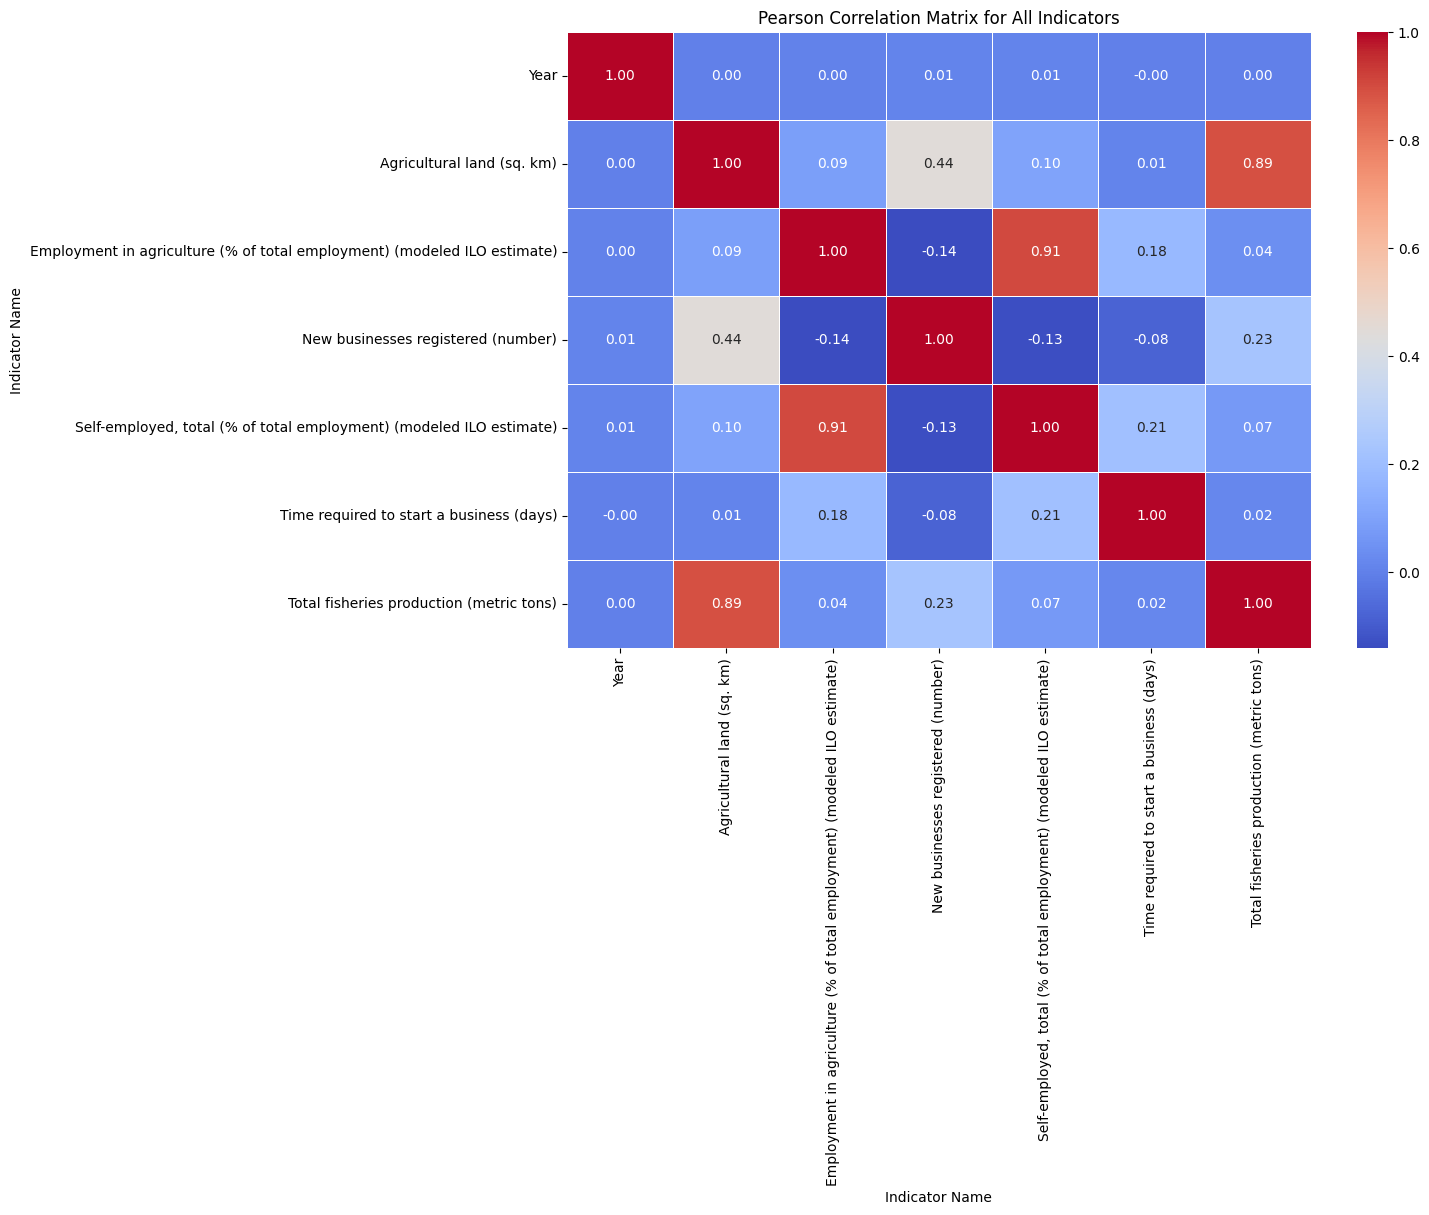

In [23]:
# Pearson Correlation Matrix for All Indicators
selected_years = ['2019', '2020']
selected_years_df = filtered_data[['Country Name', 'Indicator Name'] + selected_years]
melted_df = pd.melt(selected_years_df, id_vars=['Country Name', 'Indicator Name'], value_vars=selected_years, var_name='Year', value_name='Value')
pivoted_df = melted_df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()
pivoted_df = pivoted_df.drop(columns='Country Name')
correlation_matrix = pivoted_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson Correlation Matrix for All Indicators")
plt.show()

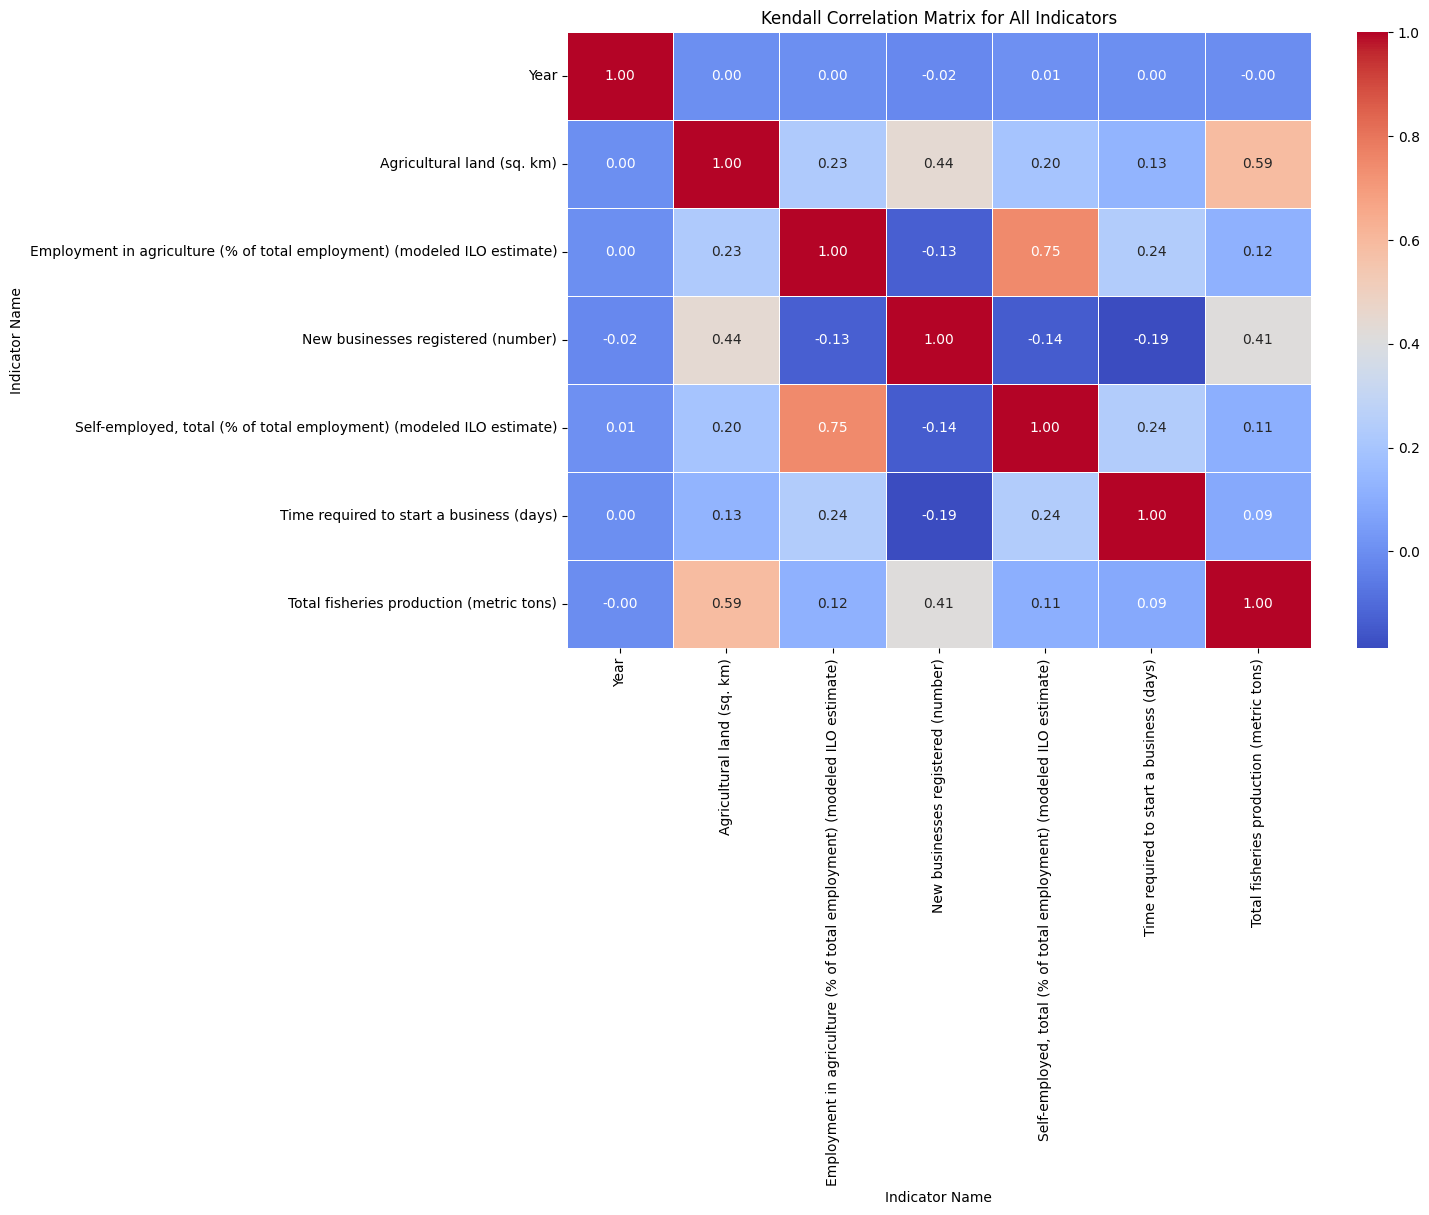

In [24]:
selected_years = ['2019', '2020']
selected_years_df = filtered_data[['Country Name', 'Indicator Name'] + selected_years]
melted_df = pd.melt(selected_years_df, id_vars=['Country Name', 'Indicator Name'],
                    value_vars=selected_years, var_name='Year', value_name='Value')
pivoted_df = melted_df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()
pivoted_df = pivoted_df.drop(columns='Country Name')
correlation_matrix = pivoted_df.corr(method = 'kendall')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Kendall Correlation Matrix for All Indicators")
plt.show()

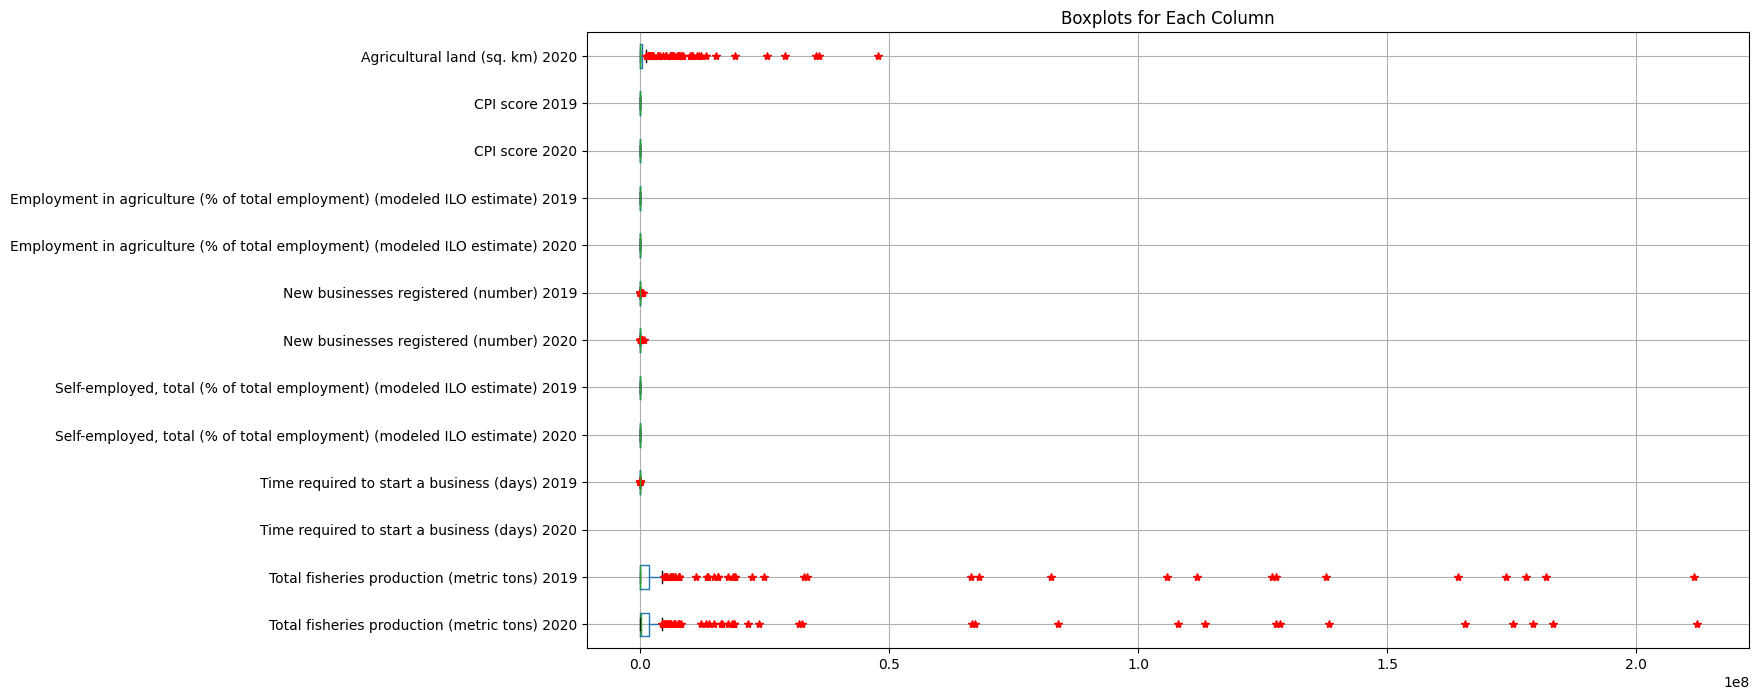

In [70]:
selected_columns = [col for col in pivoted_df.columns[3:30] if 'Rank' not in col]

# Plot boxplots for each selected column
pivoted_df[selected_columns].boxplot(sym='r*', vert=False, figsize=(15, 8))
plt.title("Boxplots for Each Column")
plt.show()

# Calculate and display potential outliers for each column
outliers = {}
for col in selected_columns:
    Q1 = pivoted_df[col].quantile(0.25)
    Q3 = pivoted_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = pivoted_df[(pivoted_df[col] < lower_bound) | (pivoted_df[col] > upper_bound)][col].tolist()
    if column_outliers:
        outliers[col] = column_outliers

# for col, values in outliers.items():
#     print(f"Potential Outliers in '{col}': {values}")

In [63]:
from scipy.stats import f_oneway

# Assuming 'filtered_df' is your DataFrame
anovadata = filtered_df.dropna()
indicator_2019 = anovadata['Total fisheries production (metric tons) 2020']
rank_2019 = anovadata['Total fisheries production (metric tons) Rank 2020']

# Check if both series have lengths greater than 1
if len(indicator_2019) > 1 and len(rank_2019) > 1:
    anova_result = f_oneway(indicator_2019, rank_2019)
    print("ANOVA Result:")
    print(anova_result)
else:
    print("Insufficient data for ANOVA.")

ANOVA Result:
F_onewayResult(statistic=1.3784600759141283, pvalue=0.25754380796824583)
